   # NEWS RECOMMENDATION SYSTEM

Based on the code used in https://medium.com/@armandj.olivares/building-nlp-content-based-recommender-systems-b104a709c042 for job based data.

#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import nltk

#### Loading data

In [2]:
# User interaction data
users = pd.read_csv('users_interactions.csv')
users.head()

,timestamp,eventType,contentId,personId,sessionId,userAgent,userRegion,userCountry
0,1465413032,VIEW,-3499919498720038879,-8845298781299428018,1264196770339959068,NaN,NaN,NaN
1,1465412560,VIEW,8890720798209849691,-1032019229384696495,3621737643587579081,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,NY,US
2,1465416190,VIEW,310515487419366995,-1130272294246983140,2631864456530402479,NaN,NaN,NaN
3,1465413895,FOLLOW,310515487419366995,344280948527967603,-3167637573980064150,NaN,NaN,NaN
4,1465412290,VIEW,-7820640624231356730,-445337111692715325,5611481178424124714,NaN,NaN,NaN


In [3]:
# article data
articles = pd.read_csv('shared_articles.csv')
articles.head()

,timestamp,eventType,contentId,authorPersonId,authorSessionId,authorUserAgent,authorRegion,authorCountry,contentType,url,title,text,lang
0,1459192779,CONTENT REMOVED,-6451309518266745024,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
1,1459193988,CONTENT SHARED,-4110354420726924665,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
2,1459194146,CONTENT SHARED,-7292285110016212249,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://cointelegraph.com/news/bitcoin-future-w...,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,en
3,1459194474,CONTENT SHARED,-6151852268067518688,3891637997717104548,-1457532940883382585,NaN,NaN,NaN,HTML,https://cloudplatform.googleblog.com/2016/03/G...,Google Data Center 360° Tour,We're excited to share the Google Data Center ...,en
4,1459194497,CONTENT SHARED,2448026894306402386,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,https://bitcoinmagazine.com/articles/ibm-wants...,"IBM Wants to ""Evolve the Internet"" With Blockc...",The Aite Group projects the blockchain market ...,en


### Merging both datasets

In [4]:
# merging both data on contentId
data = pd.merge(users, articles, on='contentId', how='inner')
data.shape

(72680, 20)

In [5]:
data.head(3)

,timestamp_x,eventType_x,contentId,personId,sessionId,userAgent,userRegion,userCountry,timestamp_y,eventType_y,authorPersonId,authorSessionId,authorUserAgent,authorRegion,authorCountry,contentType,url,title,text,lang
0,1465413032,VIEW,-3499919498720038879,-8845298781299428018,1264196770339959068,NaN,NaN,NaN,1465309434,CONTENT SHARED,-1032019229384696495,-7696592431575292648,NaN,NaN,NaN,HTML,http://techcrunch.com/2016/06/07/hiri/,Hiri wants to fix the workplace email problem,Hiri is the latest startup trying to fix email...,en
1,1465413046,VIEW,-3499919498720038879,-8845298781299428018,1264196770339959068,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5...,SP,BR,1465309434,CONTENT SHARED,-1032019229384696495,-7696592431575292648,NaN,NaN,NaN,HTML,http://techcrunch.com/2016/06/07/hiri/,Hiri wants to fix the workplace email problem,Hiri is the latest startup trying to fix email...,en
2,1465907360,VIEW,-3499919498720038879,-108842214936804958,-2163423831651021975,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,SP,BR,1465309434,CONTENT SHARED,-1032019229384696495,-7696592431575292648,NaN,NaN,NaN,HTML,http://techcrunch.com/2016/06/07/hiri/,Hiri wants to fix the workplace email problem,Hiri is the latest startup trying to fix email...,en


In [23]:
string1 = data.loc[data['personId'] == 2965795813240480461, 'title'].values
string1

array(['Chrome OS now has Material Design for the desktop',
       'Como o e-commerce brasileiro pode, enfim, começar a lucrar',
       'From E-Commerce to Web 3.0: Let the Bots Do the Shopping',
       'Accenture Launches Content Studio',
       'Infográfico: Algoritmos para Aprendizado de Máquina'],
      dtype=object)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72680 entries, 0 to 72679
Data columns (total 20 columns):
timestamp_x        72680 non-null int64
eventType_x        72680 non-null object
contentId          72680 non-null int64
personId           72680 non-null int64
sessionId          72680 non-null int64
userAgent          57184 non-null object
userRegion         57173 non-null object
userCountry        57184 non-null object
timestamp_y        72680 non-null int64
eventType_y        72680 non-null object
authorPersonId     72680 non-null int64
authorSessionId    72680 non-null int64
authorUserAgent    15254 non-null object
authorRegion       15254 non-null object
authorCountry      15254 non-null object
contentType        72680 non-null object
url                72680 non-null object
title              72680 non-null object
text               72680 non-null object
lang               72680 non-null object
dtypes: int64(7), object(13)
memory usage: 11.6+ MB


### Exploratory Data Analysis and Data Preprocessing

In [7]:
# Check for 'NaN' values in a dataframe df.
data.isnull().sum()

timestamp_x            0
eventType_x            0
contentId              0
personId               0
sessionId              0
userAgent          15496
userRegion         15507
userCountry        15496
timestamp_y            0
eventType_y            0
authorPersonId         0
authorSessionId        0
authorUserAgent    57426
authorRegion       57426
authorCountry      57426
contentType            0
url                    0
title                  0
text                   0
lang                   0
dtype: int64

In [8]:
# unique users
unq_users = data["personId"].unique().tolist()
print("Unique users:",len(unq_users))

Unique users: 1895


In [9]:
data = data[(data['lang'] == 'en')] # titles with english language

### Curious to know on which topics users are more interested

In [10]:
# Lets visualise using wordcloud
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# original text from dataset
ori_text = " ".join(text for text in data.tail(10000).text)

In [11]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white", colormap= "magma").generate(ori_text)

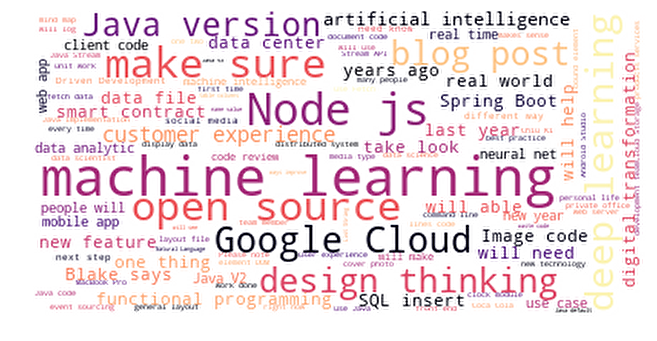

In [12]:
plt.figure(figsize=[11,11])
plt.imshow(wordcloud, interpolation="sinc")
plt.axis("off")
plt.show()

As the machine learning and artificial intelligence topics are booming up, it's too obvious that many people are more curious in reading AI related articles. Also, it seems in our data, readers are more interested towards programming and technical field.

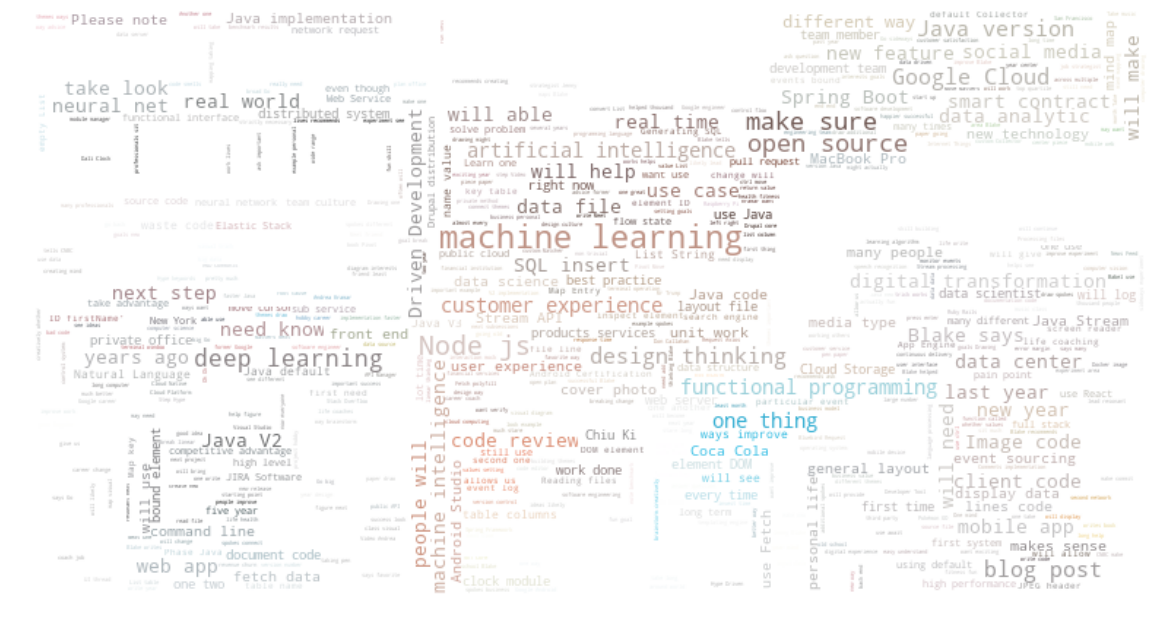

In [13]:
# Generate a word cloud image
mask = np.array(Image.open("BBC1.JPG"))
wordcloud_usa = WordCloud(stopwords=stopwords, background_color="white",
                          mode="RGBA", max_words=1000, mask=mask).generate(ori_text)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[20,20])
plt.imshow(wordcloud_usa.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("C:/Users/roshn/Downloads/wad-master/wad-master/news.png", format="png")

plt.show()

## Let's start the real process

#### Article corpus

In [14]:
article = articles[['contentId','title','text','lang']]
article= article.sort_values(by='contentId')
# choose language=english :( for proper article verification in the results
article = article[(article['lang'] == 'en')]
article.head()

,contentId,title,text,lang
563,-9192549002213406534,Chrome OS now has Material Design for the desktop,Chromebook users are in for a surprise: Chrome...,en
1641,-9190737901804729417,The Real Product Market Fit,"Michael Seibel, Y Combinator Partner, on knowi...",en
2033,-9189659052158407108,Eddy Cue and Craig Federighi Open Up About Lea...,Fast Company : Let's start talking about Maps....,en
119,-9171475473795142532,Decentralized Options Exchange Etheropt Uses A...,The price per Ether will be taken from multipl...,en
479,-9166778629773133902,Google CDN Beta is here... and it's already on...,"Some months ago, Google launched their Alpha p...",en


In [15]:
article.shape

(2264, 4)

In [16]:
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('averaged_perceptron_tagger')

#### Text preprocess function

In [17]:

from nltk.corpus import stopwords
import re
import string
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop_words_ = set(stopwords.words('english'))
wn = WordNetLemmatizer()

def black_txt(token):
    return  token not in stop_words_ and token not in list(string.punctuation)  and len(token)>2   
  
def preprocess_txt(text):
    clean_text = []
    clean_text2 = []
    text = re.sub("'", "",text)
    text=re.sub("(\\d|\\W)+"," ",text) 
    text = text.replace("nbsp", "")
    clean_text = [ wn.lemmatize(word, pos="v") for word in word_tokenize(text.lower()) if black_txt(word)]
    clean_text2 = [word for word in clean_text if black_txt(word)]
    return " ".join(clean_text2)


#### Cleaning the article corpus

In [18]:
article['title'] = article['title'].apply(preprocess_txt)

In [19]:
article.head()

,contentId,title,text,lang
563,-9192549002213406534,chrome material design desktop,Chromebook users are in for a surprise: Chrome...,en
1641,-9190737901804729417,real product market fit,"Michael Seibel, Y Combinator Partner, on knowi...",en
2033,-9189659052158407108,eddy cue craig federighi open learn apples fai...,Fast Company : Let's start talking about Maps....,en
119,-9171475473795142532,decentralize options exchange etheropt use aut...,The price per Ether will be taken from multipl...,en
479,-9166778629773133902,google cdn beta already one fastest cdns,"Some months ago, Google launched their Alpha p...",en


#### TF-IDF ( Term Frequency - Inverse Document Frequency )

In [20]:
#initializing tfidf vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

tfidf_articleid = tfidf_vectorizer.fit_transform((article['title'])) #fitting and transforming the vector
tfidf_articleid

<2264x3891 sparse matrix of type '<class 'numpy.float64'>'
	with 13497 stored elements in Compressed Sparse Row format>

### User corpus

In [21]:
user= users[['contentId','personId']]
user= user.sort_values(by='contentId')
user.head()

,contentId,personId
31165,-9222795471790223670,1895326251577378793
21445,-9222795471790223670,-5868110530814399805
21452,-9222795471790223670,-5868110530814399805
31161,-9222795471790223670,-1032019229384696495
31163,-9222795471790223670,1895326251577378793


In [22]:
data = pd.merge(user, article, on='contentId', how='inner')
data.head()

,contentId,personId,title,text,lang
0,-9192549002213406534,-1443636648652872475,chrome material design desktop,Chromebook users are in for a surprise: Chrome...,en
1,-9192549002213406534,-2979881261169775358,chrome material design desktop,Chromebook users are in for a surprise: Chrome...,en
2,-9192549002213406534,-8550167523008133722,chrome material design desktop,Chromebook users are in for a surprise: Chrome...,en
3,-9192549002213406534,-7267769888748948232,chrome material design desktop,Chromebook users are in for a surprise: Chrome...,en
4,-9192549002213406534,881856221521045800,chrome material design desktop,Chromebook users are in for a surprise: Chrome...,en


In [55]:
data.shape

(47262, 5)

In [77]:
daataa = data.drop_duplicates(['personId','title','text'], keep='last')
daataa.head()

,contentId,personId,title,text,lang
0,-9192549002213406534,-1443636648652872475,chrome material design desktop,Chromebook users are in for a surprise: Chrome...,en
2,-9192549002213406534,-8550167523008133722,chrome material design desktop,Chromebook users are in for a surprise: Chrome...,en
3,-9192549002213406534,-7267769888748948232,chrome material design desktop,Chromebook users are in for a surprise: Chrome...,en
6,-9192549002213406534,-8845298781299428018,chrome material design desktop,Chromebook users are in for a surprise: Chrome...,en
8,-9192549002213406534,7527226129639571966,chrome material design desktop,Chromebook users are in for a surprise: Chrome...,en


In [78]:
daataa.shape

(26160, 5)

### For testing the recommender, let's select the user whose ID is -1443636648652872475

In [79]:
# Random user
u = -1443636648652872475
index = np.where(daataa['personId'] == u)[0][0]
user_q = daataa.iloc[[index]]
user_q

,contentId,personId,title,text,lang
0,-9192549002213406534,-1443636648652872475,chrome material design desktop,Chromebook users are in for a surprise: Chrome...,en


In [81]:
uu = -1443636648652872475
temp=list()
for x in range(0, 510):
    temp.append(np.where(daataa['personId'] == uu)[0][x])
daataa.iloc[temp]

,contentId,personId,title,text,lang
0,-9192549002213406534,-1443636648652872475,chrome material design desktop,Chromebook users are in for a surprise: Chrome...,en
223,-9128652074338368262,-1443636648652872475,clarify use artificial intelligence enterprise,Artificial intelligence. It's dominating headl...,en
359,-9086955082453789880,-1443636648652872475,verge consumer avalanche,"If you believe in the mantra ""innovate or die,...",en
413,-9073210245497295284,-1443636648652872475,number plate recognition tensorflow,Introduction Over the past few weeks I've been...,en
440,-9064100704535292718,-1443636648652872475,stackdriver trace app engine app latency nowhe...,"At Google we're always obsessed with speed, in...",en
507,-9041823059579281174,-1443636648652872475,free online game class apex game tool,Would you like us to create free online Game A...,en
541,-9033211547111606164,-1443636648652872475,google cloud machine learn service public beta,Google announced a number of updates to its cl...,en
586,-9002191823887486987,-1443636648652872475,chatbot trend one big misunderstand,Is the Chatbot Trend One Big Misunderstanding?...,en
757,-8971085667828564532,-1443636648652872475,introduce online resize google cloud persisten...,Google Compute Engine provides Persistent Disk...,en
791,-8964534883296838326,-1443636648652872475,evernote give data center google cloud,"Evernote, which has run its cloud-based servic...",en


## Recommender system

#### Computing cosine similarity using tfidf

In [82]:
from sklearn.metrics.pairwise import cosine_similarity
user_tfidf = tfidf_vectorizer.transform(user_q['title'])
cos_similarity_tfidf = map(lambda x: cosine_similarity(user_tfidf, x),tfidf_articleid)

In [83]:
output2 = list(cos_similarity_tfidf)

###  Function to get the top-N recomendations order by score

In [84]:
def get_recommendation(top, df_all, scores):
    recommendation = pd.DataFrame(columns = ['personID', 'articleID', 'score'])
    count = 0
    for i in top:
        recommendation.at[count, 'personID'] = u
        recommendation.at[count, 'articleID'] = df_all['contentId'][i]
        recommendation.at[count, 'Title'] = df_all['title'][i]
        recommendation.at[count, 'score'] =  scores[count]
        count += 1
    return recommendation

## The top recommendations using TF-IDF

In [87]:
top = sorted(range(len(output2)), key=lambda i: output2[i], reverse=True)[:10]
list_scores = [output2[i][0][0] for i in top]
get_recommendation(top,data,list_scores)

,personID,articleID,score,Title
0,-1443636648652872475,-9192549002213406534,1,chrome material design desktop
1,-1443636648652872475,-8717945432162716060,0.564935,vital seo trend google rank digital current
2,-1443636648652872475,-8950763842769120954,0.434088,mobify report reveal impact mobile website speed
3,-1443636648652872475,-8913397556833789413,0.351438,fall web components
4,-1443636648652872475,-8900113512825364282,0.321041,bank need customer experience wake call
5,-1443636648652872475,-8388400806941996172,0.314471,manage ambient type definitions deal
6,-1443636648652872475,-8992803137960175254,0.254816,reason managers spend time coach
7,-1443636648652872475,-8992803137960175254,0.242855,reason managers spend time coach
8,-1443636648652872475,-8627051188605351707,0.241614,make git commit
9,-1443636648652872475,-8606063418076691067,0.231552,kotlin production work whats break


It is so obvious that the results are reasonable since the selected user is much interested in articles related to google. Also, we can visualize some titles related to banks and managers.

#### Using Count Vectorizer

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()

count_articleid = count_vectorizer.fit_transform((article['title'])) #fitting and transforming the vector
count_articleid

<2264x3891 sparse matrix of type '<class 'numpy.int64'>'
	with 13497 stored elements in Compressed Sparse Row format>

In [57]:
from sklearn.metrics.pairwise import cosine_similarity
user_count = count_vectorizer.transform(user_q['title'])
cos_similarity_countv = map(lambda x: cosine_similarity(user_count, x),count_articleid)

In [58]:
output2 = list(cos_similarity_countv)

## The top recommendations using CountVectorizer

In [59]:
top = sorted(range(len(output2)), key=lambda i: output2[i], reverse=True)[:10]
list_scores = [output2[i][0][0] for i in top]
get_recommendation(top, data, list_scores)

,personID,articleID,score,Title
0,-1443636648652872475,-9192549002213406534,1,chrome material design desktop
1,-1443636648652872475,-8717945432162716060,0.53033,vital seo trend google rank digital current
2,-1443636648652872475,-8950763842769120954,0.5,mobify report reveal impact mobile website speed
3,-1443636648652872475,-8913397556833789413,0.377964,fall web components
4,-1443636648652872475,-8900113512825364282,0.353553,bank need customer experience wake call
5,-1443636648652872475,-8467102776052559275,0.353553,create code review checklist daedtech
6,-1443636648652872475,-8377626164558006982,0.333333,bad write destroy company productivity
7,-1443636648652872475,-9090514312860140897,0.288675,openbazaar open business
8,-1443636648652872475,-9056114023474725450,0.288675,acquia engage day one
9,-1443636648652872475,-8954346068661072425,0.288675,technology behind preview photos


### Using KNN

In [60]:
from sklearn.neighbors import NearestNeighbors
n_neighbors = 11
KNN = NearestNeighbors(n_neighbors, p=2)
KNN.fit(tfidf_articleid)
NNs = KNN.kneighbors(user_tfidf, return_distance=True) 

In [61]:
NNs[0][0][1:]

array([0.93280715, 1.        , 1.06387209, 1.13891386, 1.16529764,
       1.17092156, 1.22080633, 1.23056467, 1.23157305, 1.23971646])

#### The top recommendations using KNN

In [62]:
top = NNs[1][0][1:]
index_score = NNs[0][0][1:]

get_recommendation(top, data, index_score)

,personID,articleID,score,Title
0,-1443636648652872475,-8717945432162716060,0.932807,vital seo trend google rank digital current
1,-1443636648652872475,-8669770849634489893,1,heres loréal plan continue digital innovation
2,-1443636648652872475,-8950763842769120954,1.06387,mobify report reveal impact mobile website speed
3,-1443636648652872475,-8913397556833789413,1.13891,fall web components
4,-1443636648652872475,-8900113512825364282,1.1653,bank need customer experience wake call
5,-1443636648652872475,-8388400806941996172,1.17092,manage ambient type definitions deal
6,-1443636648652872475,-8992803137960175254,1.22081,reason managers spend time coach
7,-1443636648652872475,-8992803137960175254,1.23056,reason managers spend time coach
8,-1443636648652872475,-8627051188605351707,1.23157,make git commit
9,-1443636648652872475,-8606063418076691067,1.23972,kotlin production work whats break
